# Finite Square Well Solving
We know that solutions look like 

\begin{equation}
-\sqrt{E} \cot\left(\sqrt{\frac{2mE}{\hbar ^2}}a\right)=\sqrt{V_o -E}
\hspace{2in}\rm{(odd)}
\\[25pt]
\sqrt{E} \tan\left(\sqrt{\frac{2mE}{\hbar ^2}}a\right)=\sqrt{V_o -E}
\hspace{2in}\rm{(even)}
\end{equation}

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7.5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.style.use('ggplot')

## Setup
First we'll set up constant values and any arrays we need for plotting. We have mass of the particle, $m$, Planck's constant, $\hbar$, the width of the well, $a$, and the depth of the well, $V_{\circ}$. We'll need the fundamental charge, $q=1.602\times10^{-19} \rm{J/eV}$ to convert between eV and Joules. We'll make an array for energies $0\leq E\leq V_{\circ}$. We'll also want to plot values as they are dependent on
$$ka=\sqrt{\frac{2mE}{\hbar^2}}a$$
because this is the boundary condition on the right hand side of the well, and this shows up in the trig function leading to cyclic behavior.

In [0]:
#Set some constants
m=9.11e-31 #kg
V0=5 #eV
q=1.602e-19
hbar=1.055e-34 #J s
a=0.75e-9 #meters box length
Eng = np.arange(V0*q/1000, V0*q, V0*q/1000) #array of energies from 0 to V0
V0_arr = np.full(1000, V0) #array of constant V0 values
ka = np.sqrt(2*m*Eng*a**2/hbar**2) #wavenumber times well width
yy1 = np.sqrt(Eng/q)*np.tan(np.sqrt(2*m*Eng*a**2/hbar**2)) #LHS even transcendental eqn
yy2 = -np.sqrt(Eng/q)/np.tan(np.sqrt(2*m*Eng*a**2/hbar**2)) #LHS odd transcendental eqn
yy3 = np.sqrt(V0-Eng/q) #RHS of transcendental eqn

When plotting tangent and cotangent, we'll get vertical lines connecting the positive and negative asymptotes. These are confusing to the eye. So, let's cut them out by setting arrays where they are over or under a certain value to infinity. Then, we'll plot the left hand side (LHS) and right hand side (RHS) of the transcendental equations.

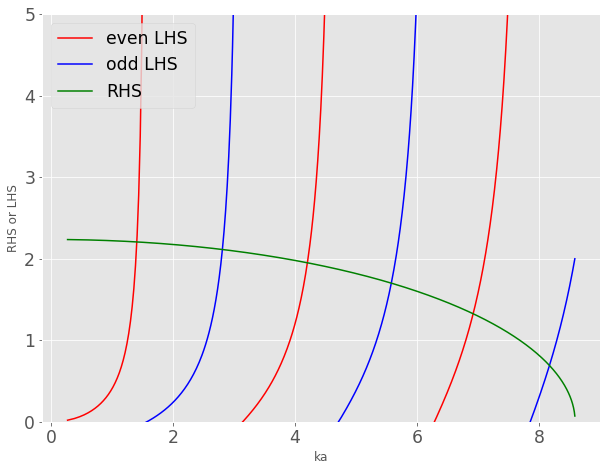

In [3]:
#Let's cut off the vertical lines that go from
#infinity to negative
threshold = 7
yy1[yy1>threshold] = np.inf
yy1[yy1<-threshold] = np.inf
yy2[yy2>threshold] = np.inf
yy2[yy2<-threshold] = np.inf
plt.plot(ka, yy1, '-r', label='even LHS')
plt.plot(ka, yy2, '-b', label='odd LHS')
plt.plot(ka, yy3, '-g', label='RHS')
plt.ylim(0,5)#will change for different starting values
plt.xlabel('ka')
plt.ylabel('RHS or LHS')
plt.legend(loc=0)
plt.show()

## Analysis
We can see that the RHS crosses the LHS in two places. These are where the transcendental equations have equality and define the allowed, bound energies. In principle, an equation solver like `Sympy.Solveset` should work, but I couldn't get it to find the allowed energies. You're welcome to try for extra credit. Instead let's take a closer look old skool. Let's plot the differences ($RHS-LHS=0$) to see where the zeroes exist. Since we want to know the allowed energies, let's plot energy on the x-axis. Then, the $y-axis = 0$ will occur at allowed energies.

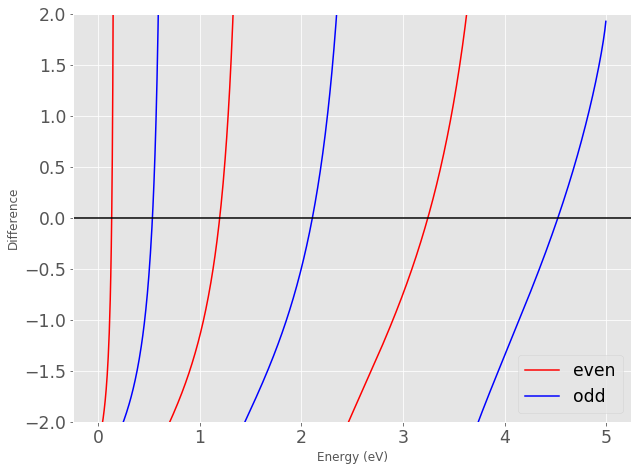

In [4]:
plt.plot(Eng/q, yy1-yy3, '-r', label="even")
plt.plot(Eng/q, yy2-yy3, '-b', label="odd")
plt.ylim(-2, 2) #will change for different starting values
plt.axhline(y=0, color='k') #plot the zero line for the y-axis
plt.xlabel('Energy (eV)')
plt.ylabel('Difference')
#plt.xlim(0,1)
plt.legend(loc=0)
plt.show()

## Where are the zeroes?
It appears there is a zero near 0.2 eV for the even function and 0.7 eV for the odd function. Try manipulating the values in `E_even` and `E_odd` below to find the allowed energy to four significant figures.

In [29]:
E_even=np.array([0.132]) #These are arrays so that you can comma separate all of the odd crossing energies
E_odd=np.array([0.505]) #These are arrays so that you can comma separate all of the even crossing energies
print(np.sqrt(E_even)*np.tan(np.sqrt(2*m*E_even*q*a**2/hbar**2))-np.sqrt(V0-E_even)) #This will print all of the answers based upon energy array length
print(-np.sqrt(E_odd)/np.tan(np.sqrt(2*m*E_odd*q*a**2/hbar**2))-np.sqrt(V0-E_odd))

[-0.1561322]
[-0.49507427]


## Using a solver
`scipy.optimize.fsolve` will solve equations for their roots (where they are equal to zero). I even found a transcendental equation example (http://folk.uio.no/inf3330/scripting/doc/python/SciPy/tutorial/old/node18.html).

We need to import `fsolve`. Then, we need to define our functions in a way that they equal zero.

\begin{equation}
-\sqrt{E} \cot\left(\sqrt{\frac{2mE}{\hbar ^2}}a\right)-\sqrt{V_o -E}=0
\hspace{2in}\rm{(odd)}
\\[25pt]
\sqrt{E} \tan\left(\sqrt{\frac{2mE}{\hbar ^2}}a\right)-\sqrt{V_o -E}=0
\hspace{2in}\rm{(even)}
\end{equation}

`numpy` does not have a `cot` function. So, we need to write it as $1/tan$.

In [31]:
from scipy.optimize import fsolve

def even(x):
  return np.sqrt(x)*np.tan(np.sqrt(2*m*x*q*a**2/hbar**2))-np.sqrt(V0-x)

def odd(x):
  return -np.sqrt(x)/np.tan(np.sqrt(2*m*x*q*a**2/hbar**2))-np.sqrt(V0-x)
  
x0 = fsolve(even, [0.132, 1.5, 3.3])# You can put comma-separated guesses for as many zero-crossings as are shown above
y0 = fsolve(odd, [0.50, 2.1,4.5])# You can put comma-separated guesses for as many zero-crossings as are shown above
print(x0, y0)

[0.13406983 1.19653161 3.24392708] [0.53469338 2.10811023 4.52280943]


## Try it for yourself
Starting from the code cell where I define the constants and arrays, copy the code and repeat the process for a deeper well ($V_{\circ}=5~\rm{eV}$). Then, try for a wider well ($a=2~\rm{nm}$). Then, try for a larger mass($m_p=1.66\times10^{-27}~\rm{kg}$). Describe and explain any changes in the number and magnitudes of the allowed energies. You may need to change `plt.ylim()` to see all of the crossings.